# Example loader for PLE scan results
Nick Yama, 17 October 2024

Example jupyter notebook for loading in `qt3ple` scan file results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [4]:
with h5py.File('x_scan.hdf5', 'r') as df:

    # This method searches the entire hdf5 file running the callback
    # `print()` (the built-in Python function) on each branch.
    print('Scanning through hdf5 file:')
    df.visititems(print)

    # File metadata information is stored in attributes of the 
    # file_metadata dataset as metadata. The attributes are listed
    # in the file_metadata dataset itself
    metadata_keys = list(df['file_metadata'])
    print('\nFile metadata keys:')
    print(metadata_keys)
    # HDF5 has some issues with lists of strings hence the weird
    # b'...' format, but it seems to work fine
    print('\nListing file metadata via attributes:')
    for key in metadata_keys:
        print(str(key)  + ': ' + df['file_metadata'].attrs[key])

    # Example for loading results from the main data group
    x_scan_positions = np.array(df['data/positions'])
    x_scan_count_rates = np.array(df['data/count_rates'])

    # Loading datasets of single values can be awkward
    # If we simply try to get the dataset the output will be
    # a h5py datastructure....
    print('\nIncorrect loading of single-valued dataset:')
    print(df['scan_settings/n_pixels'])
    # To load it correctly you need to get the entry
    n_pixels = int(df['scan_settings/n_pixels'][()])
    print('n_pixels:', n_pixels)

    # You can also access the metadata
    # All entries in data and scan_settings have these attributes
    print('\nPrinting metadata for data/count_rates:')
    units = df['data/count_rates'].attrs['units']
    description = df['data/count_rates'].attrs['description']
    print(f'Units: {units}')
    print(f'Description: {description}')

Scanning through hdf5 file:
data <HDF5 group "/data" (3 members)>
data/count_rates <HDF5 dataset "count_rates": shape (50,), type "<f8">
data/counts <HDF5 dataset "counts": shape (50,), type "<i8">
data/positions <HDF5 dataset "positions": shape (50,), type "<f8">
file_metadata <HDF5 dataset "file_metadata": shape (5,), type "|S16">
scan_settings <HDF5 group "/scan_settings" (10 members)>
scan_settings/axis <HDF5 dataset "axis": shape (), type "|O">
scan_settings/final_position_axis <HDF5 dataset "final_position_axis": shape (), type "<i8">
scan_settings/max_position <HDF5 dataset "max_position": shape (), type "<f8">
scan_settings/min_position <HDF5 dataset "min_position": shape (), type "<f8">
scan_settings/n_pixels <HDF5 dataset "n_pixels": shape (), type "<i8">
scan_settings/range <HDF5 dataset "range": shape (), type "<f8">
scan_settings/start_position_axis <HDF5 dataset "start_position_axis": shape (), type "<i8">
scan_settings/start_position_vector <HDF5 dataset "start_position_

Any variables that are `h5py` datastructures (simple copies of `df[...]`) are closed outside of the `with` and will be inaccessable.

Variables that have been converted via typecasting (e.g. `np.array(df[...])`) are retained.

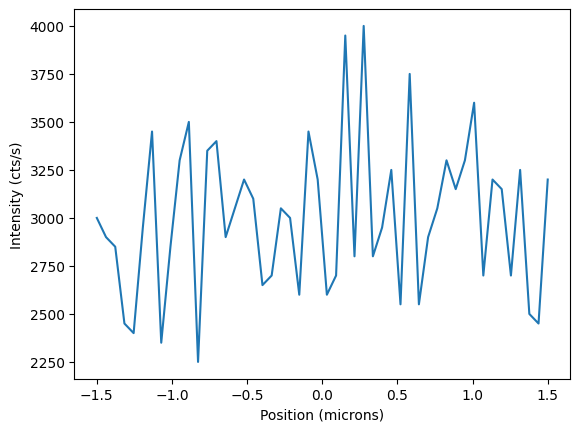

In [5]:
# Plot each of the three recorded upscans
plt.plot(x_scan_positions, x_scan_count_rates)
plt.xlabel('Position (microns)')
plt.ylabel('Intensity (cts/s)')
plt.show()

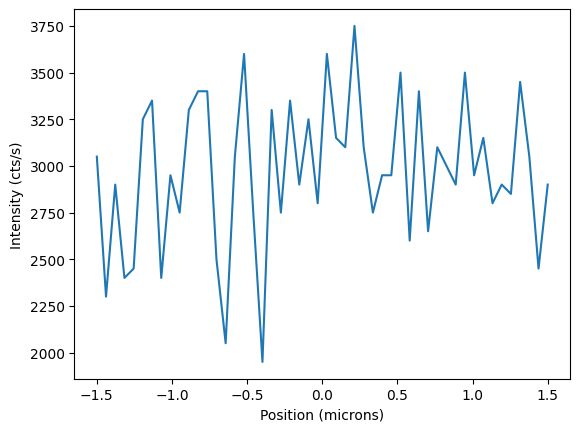

In [6]:
# Load the y scan
with h5py.File('y_scan.hdf5', 'r') as df:
    y_scan_positions = np.array(df['data/positions'])
    y_scan_count_rates = np.array(df['data/count_rates'])

# Plot each of the three recorded upscans
plt.plot(y_scan_positions, y_scan_count_rates)
plt.xlabel('Position (microns)')
plt.ylabel('Intensity (cts/s)')
plt.show()

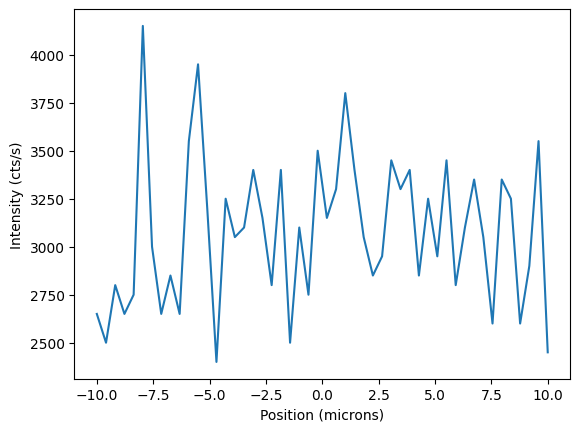

In [7]:
# Load the z scan
with h5py.File('z_scan.hdf5', 'r') as df:
    z_scan_positions = np.array(df['data/positions'])
    z_scan_count_rates = np.array(df['data/count_rates'])

# Plot each of the three recorded upscans
plt.plot(z_scan_positions, z_scan_count_rates)
plt.xlabel('Position (microns)')
plt.ylabel('Intensity (cts/s)')
plt.show()

You may also load the image scans in the same ways, but there are some small variations in the keys of the dataset due to the additional axis. You can explore the full data structure using the same basic approach of

```
with h5py.File('image.hdf5', 'r') as df:
    print('Scanning through hdf5 file:')
    df.visititems(print)
```

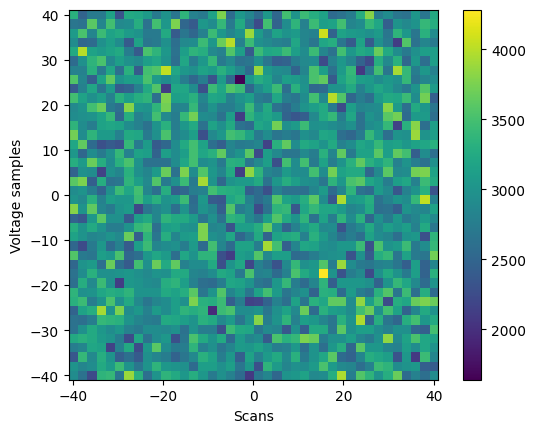

In [10]:
# Load the y scan
with h5py.File('image.hdf5', 'r') as df:
    x_min = np.array(df['scan_settings/min_position_1'])[()]
    x_max = np.array(df['scan_settings/max_position_1'])[()]
    y_min = np.array(df['scan_settings/min_position_2'])[()]
    y_max = np.array(df['scan_settings/max_position_2'])[()]

    x_range = np.array(df['scan_settings/range'])[()]
    n_pixels = np.array(df['scan_settings/n_pixels'])[()]

    data = np.array(df['data/count_rates'])

pixel_size = x_range / n_pixels

# Plotting the full scan here
# The limits are adjusted so that the pixel position is aligned
# to the center of the position the data was taken
plt.imshow(data, 
           aspect='equal', 
           interpolation='none', 
           origin='lower', 
           extent = [x_min - pixel_size/2, 
                     x_max + pixel_size/2, 
                     y_min - pixel_size/2, 
                     y_max + pixel_size/2])
plt.colorbar()
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

You may verify that the images are in agreement with the saved images from the GUI.